In [ ]:
import pandas as pd


df = pd.read_json("data.jsonl", lines=True)
df.head()
df.columns





Index(['kind', 'data'], dtype='object')

In [ ]:
data_df = pd.json_normalize(df['data'])

data_df.head()
data_df.columns


Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       ...
       'media_metadata.5myw07zahfbe1.id',
       'media_metadata.yy02g3grph8e1.status', 'media_metadata.yy02g3grph8e1.e',
       'media_metadata.yy02g3grph8e1.m', 'media_metadata.yy02g3grph8e1.o',
       'media_metadata.yy02g3grph8e1.p', 'media_metadata.yy02g3grph8e1.s.y',
       'media_metadata.yy02g3grph8e1.s.x', 'media_metadata.yy02g3grph8e1.s.u',
       'media_metadata.yy02g3grph8e1.id'],
      dtype='object', length=5234)

In [ ]:
cols_needed = ['url', 'subreddit', 'author', 'created_utc', 'title']

clean_df = data_df[cols_needed]

clean_df.head()


,url,subreddit,author,created_utc,title
0,https://www.reddit.com/r/Anarchism/comments/1i...,Anarchism,AutoModerator,1.739858e+09,What Are You Reading/Book Club Tuesday
1,https://usufructcollective.wordpress.com/2025/...,Anarchism,NewMunicipalAgenda,1.739818e+09,"""WTF is Social Ecology?"" by Usufruct Collective"
2,https://www.reddit.com/r/Anarchism/comments/1i...,Anarchism,Charming-Score7015,1.739757e+09,Who do you think is the most powerful/popular ...
3,https://www.reddit.com/r/Anarchism/comments/1i...,Anarchism,NoBackground7266,1.739816e+09,Not paying student loans or taxes
4,https://www.reddit.com/r/Anarchism/comments/1i...,Anarchism,Jewstun,1.739811e+09,Recommendations for intellectual debate content


In [ ]:
clean_df['url'].value_counts().head(10)


,count
url,
https://www.reuters.com/world/us/musk-aides-lock-government-workers-out-computer-systems-us-agency-sources-say-2025-01-31/,4
https://apnews.com/article/doge-faa-air-traffic-firings-safety-67981aec33b6ee72cbad8dcee31f3437,4
https://www.nbcnews.com/politics/national-security/trump-administration-wants-un-fire-nuclear-safety-workers-cant-figure-rcna192345,4
https://thehill.com/homenews/senate/5135759-whistleblower-portal-trump-administration/,3
https://babylonbee.com/news/democrats-republicans-panic-as-trump-brings-world-to-brink-of-peace,3
https://www.npr.org/2025/02/11/nx-s1-5293447/jan-6-evidence-captiol-riot-donald-trump,3
https://www.nbcnews.com/politics/elections/wisconsin-supreme-court-race-2025-battleground-state-rcna191726,3
https://www.propublica.org/article/ap3-oath-keepers-militia-mole,3
https://www.politico.com/news/2025/02/16/trump-administration-firings-bird-flu-response-00204542,3


In [ ]:
url_to_analyze = "https://www.reuters.com/world/us/musk-aides-lock-government-workers-out-computer-systems-us-agency-sources-say-2025-01-31/"

url_df = clean_df[clean_df['url'] == url_to_analyze]

url_df.head()


,url,subreddit,author,created_utc,title
3581,https://www.reuters.com/world/us/musk-aides-lo...,Republican,worklife321,1.738590e+09,"Federal workers, what are your thoughts?"
3586,https://www.reuters.com/world/us/musk-aides-lo...,Republican,Beepboopblapbrap,1.738549e+09,What is the conservative opinion on this?
4484,https://www.reuters.com/world/us/musk-aides-lo...,democrats,ErockLobster,1.738471e+09,Is... Isn't this watergate?
4549,https://www.reuters.com/world/us/musk-aides-lo...,democrats,LolAtAllOfThis,1.738356e+09,Musk aides lock government workers out of comp...


In [ ]:
len(url_df)



4

In [ ]:
url_df['created_utc'].head()


,created_utc
3581,1.738590e+09
3586,1.738549e+09
4484,1.738471e+09
4549,1.738356e+09


In [ ]:
url_df['created_time'] = pd.to_datetime(url_df['created_utc'], unit='s')

url_df[['created_utc', 'created_time']]


/tmp/ipython-input-3071304612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_df['created_time'] = pd.to_datetime(url_df['created_utc'], unit='s')


,created_utc,created_time
3581,1.738590e+09,2025-02-03 13:39:42
3586,1.738549e+09,2025-02-03 02:23:12
4484,1.738471e+09,2025-02-02 04:31:33
4549,1.738356e+09,2025-01-31 20:46:07


In [ ]:
url_df = url_df.copy()

url_df['created_time'] = pd.to_datetime(url_df['created_utc'], unit='s')


In [ ]:
url_df = url_df.sort_values('created_time')

url_df[['created_time', 'subreddit', 'author']]


,created_time,subreddit,author
4549,2025-01-31 20:46:07,democrats,LolAtAllOfThis
4484,2025-02-02 04:31:33,democrats,ErockLobster
3586,2025-02-03 02:23:12,Republican,Beepboopblapbrap
3581,2025-02-03 13:39:42,Republican,worklife321


In [ ]:
url_df['subreddit'].value_counts()


,count
subreddit,
democrats,2
Republican,2


In [ ]:
url_df['date'] = url_df['created_time'].dt.date
daily_counts = url_df.groupby('date').size()
daily_counts


,0
date,
2025-01-31,1
2025-02-02,1
2025-02-03,2


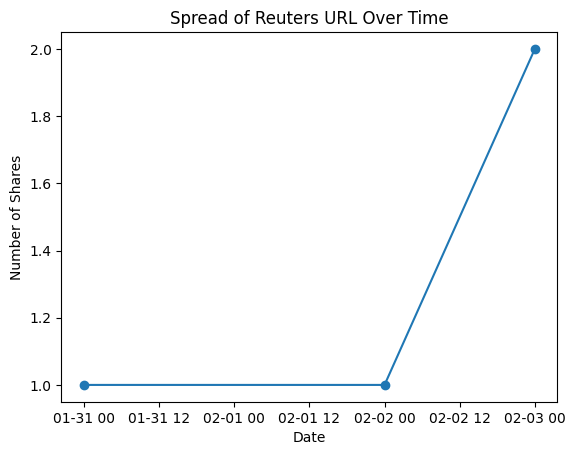

In [ ]:
import matplotlib.pyplot as plt

daily_counts.plot(kind='line', marker='o')
plt.xlabel("Date")
plt.ylabel("Number of Shares")
plt.title("Spread of Reuters URL Over Time")
plt.show()


In [ ]:
url_df.groupby(['date', 'subreddit']).size()


,,0
date,subreddit,
2025-01-31,democrats,1
2025-02-02,democrats,1
2025-02-03,Republican,2


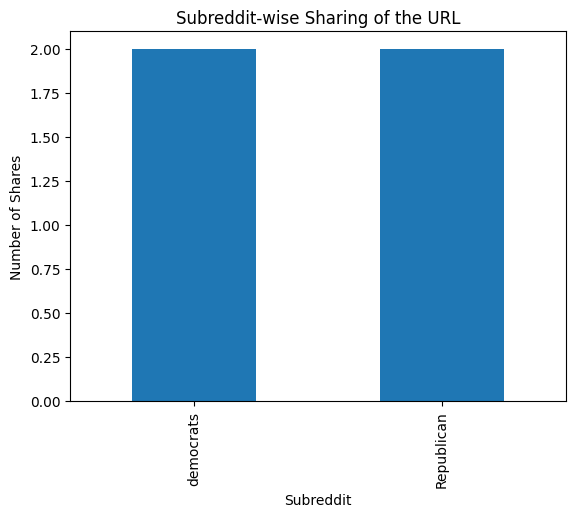

In [ ]:
url_df['subreddit'].value_counts().plot(kind='bar')
plt.xlabel("Subreddit")
plt.ylabel("Number of Shares")
plt.title("Subreddit-wise Sharing of the URL")
plt.show()
